In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import warnings

In [45]:
def PCA():
    pc1 = np.loadtxt("Data/PC_hyperspectral_1.txt")
    pc2 = np.loadtxt("Data/PC_hyperspectral_2.txt")
    pc3 = np.loadtxt("Data/PC_hyperspectral_3.txt")
    
    return pc1, pc2, pc3

In [12]:
def Sens_curves(option_opsins):
    
    if option_opsins==0:
        ##### Raw opsin responses
        N_points = 13
        raw = np.loadtxt("Data/Opsins_raw.txt")
        idx = np.array(np.linspace(0,raw[0,:].size-1, N_points),dtype=int)
        return raw[-1,idx], raw[0,idx], raw[1,idx], raw[2,idx], raw[3,idx]
        
    if option_opsins==1:
        ##### Fitted opsin responses HC-blocked
        N_points = 30
        fit = np.loadtxt("Data/Opsins_fit.txt")
        idx = np.array(np.linspace(0,fit[0,:].size-1, N_points),dtype=int)
        return fit[-1,idx], fit[0,idx], fit[1,idx], fit[2,idx], fit[3,idx]
    
    if option_opsins==2:
        ##### Functional opsin curves
        Red_ops = np.loadtxt("Data/Functional_trace_OpsinR.txt")
        Green_ops = np.loadtxt("Data/Functional_trace_OpsinG.txt")
        Blue_ops = np.loadtxt("Data/Functional_trace_OpsinB.txt")
        UV_ops = np.loadtxt("Data/Functional_trace_OpsinU.txt")
        l_array = np.loadtxt("Data/Functional_trace_Opsin_wavelength.txt")
        
        Red_mean = np.mean(np.reshape(Red_ops[1,:], (int(Red_ops[1,:].size/13), 13)), axis=0)
        Green_mean = np.mean(np.reshape(Green_ops[1,:], (int(Green_ops[1,:].size/13), 13)), axis=0)
        Blue_mean = np.mean(np.reshape(Blue_ops[1,:], (int(Blue_ops[1,:].size/13), 13)), axis=0)
        UV_mean = np.mean(np.reshape(UV_ops[1,:], (int(UV_ops[1,:].size/13), 13)), axis=0)
        
        Red_mean = np.mean(np.reshape(Red_ops[1,:], (int(Red_ops[1,:].size/13), 13)), axis=0)
        Green_mean = np.mean(np.reshape(Green_ops[1,:], (int(Green_ops[1,:].size/13), 13)), axis=0)
        Blue_mean = np.mean(np.reshape(Blue_ops[1,:], (int(Blue_ops[1,:].size/13), 13)), axis=0)
        UV_mean = np.mean(np.reshape(UV_ops[1,:], (int(UV_ops[1,:].size/13), 13)), axis=0)
    
        return np.flip(l_array), (Red_mean), (Green_mean), (Blue_mean), (UV_mean)
    

### Plots

(350, 650)

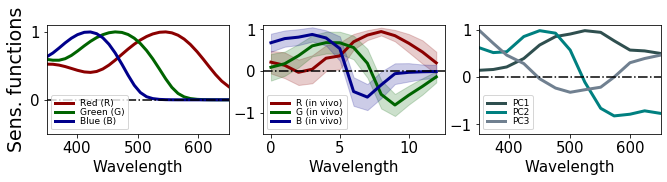

In [46]:
fig=plt.figure(figsize=(11,2))

grid2 = plt.GridSpec(1, 9, wspace=0.9)

p1=fig.add_subplot(grid2[0,:3]) #Sens curves
p2=fig.add_subplot(grid2[0,3:6]) #Functional responses
p5=fig.add_subplot(grid2[0,6:]) #PCs

##### Plot opsins_HCblock + PCA + opsins_functional
option_opsins = 1 #0 if raw opsins, 1 if fitted opsins with HC-blocked, 2 if functional opsins.
LL, RR, GG, BB, UU = Sens_curves(option_opsins) # Red and Green combination
PC1, PC2, PC3 = PCA()
Red_ops = np.loadtxt("Data/Functional_trace_OpsinR.txt")
Green_ops = np.loadtxt("Data/Functional_trace_OpsinG.txt")
Blue_ops = np.loadtxt("Data/Functional_trace_OpsinB.txt")
UV_ops = np.loadtxt("Data/Functional_trace_OpsinU.txt")
l_array = np.loadtxt("Data/Functional_trace_Opsin_wavelength.txt")

sns.lineplot(ax = p2, x=Red_ops[0,:],y=Red_ops[1,:]/np.max(Red_ops[1,:]),color = 'darkred', linewidth = 3, ci='sd', label='R (in vivo)')
sns.lineplot(ax = p2, x=Green_ops[0,:],y=(Green_ops[1,:]/np.max(Green_ops[1,:])),color = 'darkgreen', linewidth = 3, ci='sd', label='G (in vivo)')
sns.lineplot(ax = p2, x=Blue_ops[0,:],y=(Blue_ops[1,:]/ np.max(Blue_ops[1,:])),color = 'darkblue', linewidth = 3, ci='sd', label='B (in vivo)')

p2.axhline(y=0,color='k',linestyle='-.')
p2.set_xlabel("Wavelength",fontsize=15)
p2.tick_params(labelsize=15)
p2.legend(fontsize=9,handleheight=0.1, labelspacing=0.006)
p2.set_ylim(-1.5,1.1) 

p1.plot(LL,RR,color='darkred',marker='o',markerfacecolor='none',markersize='0',label='Red (R)',linewidth = 3)
p1.plot(LL,GG,color='darkgreen',marker='o',markerfacecolor='none',markersize='0',label='Green (G)',linewidth = 3)
p1.plot(LL,BB,color='darkblue',marker='o',markerfacecolor='none',markersize='0',label='Blue (B)',linewidth = 3)
p1.set_xlabel("Wavelength",fontsize=15)
p1.set_ylabel("Sens. functions",fontsize=19)
p1.tick_params(labelsize=15)
p1.axhline(y=0,color='k',linestyle='-.')
p1.legend(fontsize=9,loc=3,handleheight=0.1, labelspacing=0.006)
p1.set_ylim(-0.5, 1.1)
p1.set_xlim(350,650)

p5.plot(PC1[0,:],PC1[1,:],color='darkslategray',marker='o',markerfacecolor='none',markersize='0',label='PC1',linewidth = 3)
p5.plot(PC2[0,:],PC2[1,:],color='teal',marker='o',markerfacecolor='none',markersize='0',label='PC2',linewidth = 3)
p5.plot(PC3[0,:],PC3[1,:],color='slategray',marker='o',markerfacecolor='none',markersize='0',label='PC3',linewidth = 3)
p5.axhline(y=0,color='k',linestyle='-.')
p5.set_xlabel("Wavelength",fontsize=15)
p5.tick_params(labelsize=15)
p5.legend(fontsize=9,loc=3,handleheight=0.1, labelspacing=0.006)
p5.set_ylim(-1.2,1.1)
p5.set_xlim(350,650)

# plt.savefig("Plots/Opsin+PCA+FixedPoints_3.pdf",bbox_inches = 'tight', pad_inches = 0)
# plt.savefig("Plots/Opsin+PCA+FixedPoints_2_combination1.pdf",bbox_inches = 'tight', pad_inches = 0)

### Current response

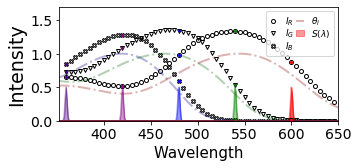

In [44]:
fig, p1 = plt.subplots(1, figsize=(5,2.1))

N_points = 300
fit = np.loadtxt("Data/Opsins_fit.txt")
idx = np.array(np.linspace(0,fit[0,:].size-1, N_points),dtype=int)
LL = fit[-1,idx]
RR = fit[0,idx]
GG = fit[1,idx]
BB = fit[2,idx]
UV = fit[3,idx]

Ir = 0
Ig = 0
Il = 0
Ib = 0
for l0 in range(360, 650, 5):
    sigma = 1
    Z_norm = 1/np.max( np.exp(-(x_array-l0)**2/(2*(sigma**2))) )
    x_array = np.linspace(350,650,300) 
    G_pulse = 0.5*Z_norm*np.exp(-(x_array-l0)**2/(2*(sigma**2)))
    Ir = np.append(Ir, np.sum(RR*G_pulse))
    Ig = np.append(Ig, np.sum(GG*G_pulse))
    Ib = np.append(Ib, np.sum(BB*G_pulse))
    Il = np.append(Il, l0)
  
Colors = ['indigo','purple', 'blue', 'green', 'red']
counter = -1

p1.plot(Il[1:], Ir[1:], marker='o', color='k', markersize='4', label=r'$I_{R}$', linestyle='none', markerfacecolor='none')
p1.plot(Il[1:], Ig[1:], marker='v', color='k', markersize='4', label=r'$I_{G}$', linestyle='none', markerfacecolor='none')
p1.plot(Il[1:], Ib[1:], marker='X', color='k', markersize='4', label=r'$I_{B}$', linestyle='none', markerfacecolor='none')
p1.plot(LL,RR,color='darkred',marker='o',markerfacecolor='none',markersize='0',label=r'$\theta_{i}$',linewidth = 2, linestyle = '-.', alpha = 0.3)
p1.plot(LL,GG,color='darkgreen',marker='o',markerfacecolor='none',markersize='0',linewidth = 2, linestyle = '-.', alpha = 0.3)
p1.plot(LL,BB,color='darkblue',marker='o',markerfacecolor='none',markersize='0',linewidth = 2, linestyle = '-.', alpha = 0.3)
for l0 in range(360, 650, 60):
    counter+=1
    sigma = 1
    Z_norm = 1/np.max( np.exp(-(x_array-l0)**2/(2*(sigma**2))) )
    x_array = np.linspace(350,650,300) 
    G_pulse = 0.5*Z_norm*np.exp(-(x_array-l0)**2/(2*(sigma**2)))
    p1.plot(x_array, G_pulse, color=Colors[counter], alpha=0.4)
    p1.fill_between(x_array, G_pulse, color=Colors[counter], alpha=0.4)
    p1.plot(np.array([l0]), np.array([np.sum(RR*G_pulse)]), marker='o', color=Colors[counter], markersize='2')
    p1.plot(np.array([l0]), np.array([np.sum(GG*G_pulse)]), marker='v', color=Colors[counter], markersize='2')
    p1.plot(np.array([l0]), np.array([np.sum(BB*G_pulse)]), marker='X', color=Colors[counter], markersize='2')

p1.fill_between(x_array, G_pulse, color=Colors[counter], alpha=0.4, label=r'$S(\lambda)$')    
p1.set_xlabel("Wavelength",fontsize=15)
p1.set_ylabel("Intensity",fontsize=19)
p1.tick_params(labelsize=11)
p1.legend(fontsize=7,ncol=1, labelspacing=0.0006, loc=1, columnspacing = 0.12, handlelength = 1)
p1.set_ylim(0,1.1)
p1.set_xlim(353,640)
p1.legend(fontsize=9, ncol=2, labelspacing=0.00001, loc=1, columnspacing = 0.2, handlelength = 0.9)
p1.set_ylim(-0.,1.7)
p1.set_xlim(353,650)
p1.tick_params(labelsize=14)

# plt.savefig("Plots/Fig1_currents_2.pdf")